# 21 號顏嘉佑
## 正式答案在後面，答案開始時會有Markdown 註記，前面只是一些資料的觀察，以及寫程式過程中用來參考的依據

In [2]:
# books_Excel.py
def showkind(url,kind):
    html = requests.get(url,headers=headers).text
    soup = BeautifulSoup(html,'html.parser') 
    try:
        pages=int(soup.select('.cnt_page span')[0].text)  # 該分類共有多少頁
        print("共有",pages,"頁")
        for page in range(1,pages+1):
            pageurl=url + '&page=' + str(page).strip()
            print("第",page,"頁",pageurl)
            showpage(pageurl,kind)
    except:  # 沒有分頁的處理
        showpage(url,kind)        

def showpage(url,kind):
    html = requests.get(url,headers=headers).text 
    soup = BeautifulSoup(html,'html.parser') 
    #近期新書、在 class="mod type02_m012 clearfix" 中
    res = soup.find_all('div',{'class':'mod type02_m012 clearfix'})[0]
    items=res.select('.item')  # 所有 item
    n=0  # 計算該分頁共有多少本書
    for item in items:
        msg=item.select('.msg')[0] 
        src=item.select('a img')[0]["src"]
        title=msg.select('a')[0].text  #書名
        imgurl=src.split("?i=")[-1].split("&")[0] #圖片網址
        author=msg.select('a')[1].text #作者
        publish=msg.select('a')[2].text #出版社
        date=msg.find('span').text.split("：")[-1] #出版日期
        onsale=item.select('.price .set2')[0].text #優惠價
        content=item.select('.txt_cont')[0].text.replace(" ","").strip()  #內容
        # 將資料加入 list1 串列中
        listdata=[kind,title,imgurl,author,publish,date,onsale,content]
        list1.append(listdata)
        n+=1
        print("n=",n)

def twobyte(kindno):
    if kindno<10:
        kindnostr="0"+str(kindno)
    else:
        kindnostr=str(kindno) 
    return kindnostr

#主程式
import requests
from bs4 import BeautifulSoup
import csv
import openpyxl
#import gspread
#from oauth2client.service_account import ServiceAccountCredentials
from time import sleep

list1=[]    
kindno=1  # 要下載的分類，預設為第 1分類：文學小說
homeurl = 'http://www.books.com.tw/web/books_nbtopm_01/?o=5&v=1'
mode="?o=5&v=1" #顯示模式：直式  排序依：暢銷度
url="https://www.books.com.tw/web/books_nbtopm_" 
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36'}
html = requests.get(homeurl,headers=headers).text
soup = BeautifulSoup(html,'html.parser') 
#中文書新書分類，取得分類資訊
res = soup.find('div',{'class':'mod_b type02_l001-1 clearfix'})
hrefs=res.select("a")
kindno=int(input("請輸入要下載的分類："))
if 0 < kindno <= len(hrefs):
    kind=hrefs[kindno-1].text #分類名稱
    print("下載的分類編號：{}   分類名稱：{}" .format(kindno,kind))
    # 下載指定的分類
    kindurl=url + twobyte(kindno) + mode # 分類網址  
    showkind(kindurl,kind) # 顯示該分類所有書籍    
    # 儲存 cvs
    print("資料寫入Excel中，請等侯幾分鐘!")
    workbook=openpyxl.Workbook()
    sheet = workbook.worksheets[0]
    listtitle=["分類","書名","圖片網址","作者","出版社","出版日期","優惠價","內容"]
    sheet.append(listtitle)
    for item1 in list1: #資料
        sheet.append(item1)
        sleep(0.1) # 必須加上適當的 delay  
    workbook.save('books.xlsx')
else:
    print("分類不存在!") 
print("資料儲存完畢!")    

請輸入要下載的分類：1
下載的分類編號：1   分類名稱：文學小說
共有 7 頁
第 1 頁 https://www.books.com.tw/web/books_nbtopm_01?o=5&v=1&page=1
n= 1
n= 2
n= 3
n= 4
n= 5
n= 6
n= 7
n= 8
n= 9
n= 10
n= 11
n= 12
n= 13
n= 14
n= 15
n= 16
n= 17
n= 18
n= 19
n= 20
n= 21
n= 22
n= 23
n= 24
n= 25
n= 26
n= 27
n= 28
n= 29
n= 30
n= 31
n= 32
n= 33
n= 34
n= 35
n= 36
n= 37
n= 38
n= 39
n= 40
n= 41
n= 42
n= 43
n= 44
n= 45
n= 46
n= 47
n= 48
n= 49
n= 50
n= 51
n= 52
n= 53
n= 54
n= 55
n= 56
n= 57
n= 58
n= 59
n= 60
n= 61
n= 62
n= 63
n= 64
n= 65
n= 66
n= 67
n= 68
n= 69
n= 70
n= 71
n= 72
n= 73
n= 74
n= 75
n= 76
n= 77
n= 78
n= 79
n= 80
n= 81
n= 82
n= 83
n= 84
n= 85
n= 86
n= 87
n= 88
n= 89
n= 90
n= 91
n= 92
n= 93
n= 94
n= 95
n= 96
n= 97
n= 98
n= 99
n= 100
第 2 頁 https://www.books.com.tw/web/books_nbtopm_01?o=5&v=1&page=2
n= 1
n= 2
n= 3
n= 4
n= 5
n= 6
n= 7
n= 8
n= 9
n= 10
n= 11
n= 12
n= 13
n= 14
n= 15
n= 16
n= 17
n= 18
n= 19
n= 20
n= 21
n= 22
n= 23
n= 24
n= 25
n= 26
n= 27
n= 28
n= 29
n= 30
n= 31
n= 32
n= 33
n= 34
n= 35
n= 36
n= 37
n= 38
n= 39
n= 40
n= 4


### 以下是散文類的書籍，出版日期從 12/29 開始，而題目要求的出版日期範圍 是從第一頁 n = 9 開始到 第二頁的 n = 9 

In [7]:
showpage("https://www.books.com.tw/web/sys_bbotm/books/010201/?v=1&pd=5&o=2","散文")

n= 1
['散文', '小物會', 'https://www.books.com.tw/img/001/087/86/0010878658.jpg', '夏夏', '時報出版', '2020-12-29', '優惠價：9折\xa0351元', '物件一旦有了故事，就有了靈魂，而靈魂是不能丟棄的。為每個物件而寫的「創世紀」，召喚逝去不再回的特別時刻。∥2020年OPENBOOK好書獎、《文訊》21世紀上升星座散文類得主夏夏，繼《傍晚五點十五分》...more']
n= 2
['散文', '從香港到台灣', 'https://www.books.com.tw/img/001/088/00/0010880053.jpg', '傑拉德,列當度,羅伊,老溫,許思庭,鄭湯尼', '天空數位圖書', '2020-12-29', '優惠價：9折\xa0495元', '寶島台灣有美麗的風景與及美味的食物，每年吸引各地遊客到台灣一遊，觀美景，嚐美食。台灣與香港在地理位置上，是非常近的，因這便利，不少香港人喜歡到台灣旅遊。除了旅遊，亦不有少人選擇移居台灣。居住...more']
n= 3
['散文', '暢所欲言', 'https://www.books.com.tw/img/001/088/00/0010880055.jpg', '曼殊,汶莎,老溫,黃萱萱', '天空數位圖書', '2020-12-29', '優惠價：9折\xa0243元', '母親的眼中，不論孩兒是年幼或是已成年，總是占有很重要的位置，甚或最重要的。食物有不同的味道，風景與物事同樣有不同的味道，是舊日回憶的味道，百般滋味在心頭。不同的時節天氣會有變化更替，也...more']
n= 4
['散文', '我媽媽做小姐的時陣是文藝少女', 'https://www.books.com.tw/img/001/087/84/0010878478.jpg', '謝凱特', '九歌', '2020-12-30', '優惠價：9折\xa0252元', '榮獲林榮三文學獎、臺北文學獎的青年作家謝凱特，繼與家庭斷裂切割的《我的蟻人父親》、重建關係的《普通的戀愛》後，推出描繪與繼承母性的《我媽媽做小姐的時陣是文藝少女》。作者在同名篇章中指出，...more']
n= 5
['散文', '我媽媽做小姐的時陣是文藝少女(限量簽名版)', 

In [9]:

showpage("https://www.books.com.tw/web/sys_bbotm/books/010201/?o=2&v=1&pd=5&page=2","散文")

n= 1
['散文', '荒涼手記', 'https://www.books.com.tw/img/001/088/66/0010886659.jpg', '黃斐柔', '采實文化', '2021-03-25', '優惠價：9折\xa0315元', '我們總在離開歸屬之地後心才會真正屬於歸屬之地///青青的島書店老闆、大地系女孩黃斐柔，首本散文書寫獻給孤獨生命的流浪情書「人生中有那麼多的路，只能自己一個人走。」開了一間小書店，創...more']
n= 2
['散文', '地緣日本(增訂版)', 'https://www.books.com.tw/img/001/088/79/0010887957.jpg', '盧峯', '信報出版社', '2021-03-25', '優惠價：9折\xa0477元', '位於九州最南方的鹿兒島縣，今天出名的是黑豬與溫泉，其實更有名的，是推翻幕府封建的反革命分子根據地；橫濱海港已然成為今天日本的重要生活圈，在明治時期卻是美日角力的主要舞台；本州西部廣島，...more']
n= 3
['散文', '跟著俊賢去旅行', 'https://www.books.com.tw/img/001/088/80/0010888086.jpg', '許遠達,龔卓軍', '我己文創有限公司', '2021-03-25', '優惠價：9折\xa0799元', '《昆丁藍》、《南島藍》雙封面，重磅出版人稱漂撇「爐主」的前高雄美術館館長本身為畫家的李俊賢，作品中埋伏著各式地方語言、文化元素及在地意象，譬如亞熱帶物產與陸地海景，皆囊括於其鮮豔搶眼的作...more']
n= 4
['散文', '貓在之地', 'https://www.books.com.tw/img/001/088/72/0010887279.jpg', '崔舜華', '寶瓶文化', '2021-03-26', '優惠價：79折\xa0253元', '我的內部有災難，有戰爭，有殺人如麻的魔鬼，有無情冷酷的神明。我是情感的難民，現實的餘孽物。一個清醒而完整的黑夜，是一場至福的拷問──如果可以，誰不願做愛裡的良民?她是城市的夜遊者，...more']
n= 5
['散文', '老派少女購物路線', 'https://www.books.com.tw/img/001/088/68/001088682

# 答案從這裡開始
#### 爬散文類

In [46]:
import requests
from bs4 import BeautifulSoup
import csv
import openpyxl
#import gspread
#from oauth2client.service_account import ServiceAccountCredentials
from time import sleep

# Excel_散文
list_ans =[]
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36'}
html1 = requests.get("https://www.books.com.tw/web/sys_bbotm/books/010201/?v=1&pd=5&o=2",headers=headers).text 
html2 = requests.get("https://www.books.com.tw/web/sys_bbotm/books/010201/?o=2&v=1&pd=5&page=2",headers=headers).text 

soup = BeautifulSoup(html1,'html.parser') 
#近期新書、在 class="mod type02_m012 clearfix" 中
res = soup.find_all('div',{'class':'mod type02_m012 clearfix'})[0]
items=res.select('.item')  # 所有 item
n=0  # 計算該分頁共有多少本書
kind = "散文"
for item in items:
    msg=item.select('.msg')[0] 
    src=item.select('a img')[0]["src"]
    title=msg.select('a')[0].text  #書名
    imgurl=src.split("?i=")[-1].split("&")[0] #圖片網址
    author=msg.select('a')[1].text #作者
    publish=msg.select('a')[2].text #出版社
    date=msg.find('span').text.split("：")[-1] #出版日期
    onsale=item.select('.price .set2')[0].text #優惠價
    content=item.select('.txt_cont')[0].text.replace(" ","").strip()  #內容
    # 將資料加入 list1 串列中
    n+=1
    #print("第一頁")
    if n >=9:
        #print("n=",n)
        listdata=[kind,title,imgurl,author,publish,date,onsale,content]
        list_ans.append(listdata)
soup = BeautifulSoup(html2,'html.parser') 
#近期新書、在 class="mod type02_m012 clearfix" 中
res = soup.find_all('div',{'class':'mod type02_m012 clearfix'})[0]
items=res.select('.item')  # 所有 item
n=0  # 計算該分頁共有多少本書
for item in items:
    msg=item.select('.msg')[0] 
    src=item.select('a img')[0]["src"]
    title=msg.select('a')[0].text  #書名
    imgurl=src.split("?i=")[-1].split("&")[0] #圖片網址
    author=msg.select('a')[1].text #作者
    publish=msg.select('a')[2].text #出版社
    date=msg.find('span').text.split("：")[-1] #出版日期
    onsale=item.select('.price .set2')[0].text #優惠價
    content=item.select('.txt_cont')[0].text.replace(" ","").strip()  #內容
    # 將資料加入 list1 串列中
    n+=1
    #print("第二頁")
    if n <=9:
        #print("n=",n)
        listdata=[kind,title,imgurl,author,publish,date,onsale,content]
        list_ans.append(listdata)
#print(list_ans)


### 統計

In [48]:
Dict = {}
for item in list_ans:
    n = item[4] 
    if n in Dict:
        Dict[n] =  Dict[n] +1
    else:
        Dict[n] = 1
print("各出版社出版書的數目如下")
print(Dict)

各出版社出版書的數目如下
{'愛智': 2, '白象文化': 4, '皇冠': 6, '天空數位圖書': 11, '木果文創有限公司': 1, '麥田': 2, '布克文化': 1, '三民': 4, '丁強': 1, '天地圖書': 1, '張老師文化': 1, 'more': 2, '匯智出版社': 1, '中華': 3, '印刻': 3, '城邦印書館': 1, '爾雅': 4, '新經典文化': 2, '聯合文學': 4, '淡江大學出版中心': 1, '澎湖縣政府文化局': 1, '時報出版': 6, '大塊文化': 2, '九歌': 6, '聯經出版公司': 1, '有鹿文化': 2, '秀威資訊': 2, '致出版': 1, '春山出版': 1, '東美出版事業有限公司': 1, '財團法人褚林貴教育基金會': 1, '藍海文化': 2, '經典雜誌出版社': 1, '牛津大學': 1, '博揚': 1, '佛光': 1, '從容國際文化': 1, '財團法人法鼓山文教基金會-法鼓文化': 1, '胡鼎宗': 1, '華騰文化': 1, '八方': 2, '香港文學館': 2, '白卷出版社': 1, '采實文化': 1, '信報出版社': 1, '我己文創有限公司': 1, '寶瓶文化': 1, '遠流': 1, '天下雜誌': 1, '高寶': 1}


In [53]:
Dict = {'1':0,'2':0,'3':0}
for item in list_ans:
    n = item[5][6]
    if n in Dict:
        Dict[n] += 1
print("各月分出版數目如下")
print(Dict)

各月分出版數目如下
{'1': 40, '2': 22, '3': 39}


In [49]:
# 儲存 excel
print("資料寫入Excel中，請等侯幾分鐘!")
workbook=openpyxl.Workbook()
sheet = workbook.worksheets[0]
listtitle=["分類","書名","圖片網址","作者","出版社","出版日期","優惠價","內容"]
sheet.append(listtitle)
for item1 in list_ans: #資料
    sheet.append(item1)
    sleep(0.1) # 必須加上適當的 delay  
workbook.save('books_ans.xlsx')
print("資料儲存完畢!") 

資料寫入Excel中，請等侯幾分鐘!
資料儲存完畢!


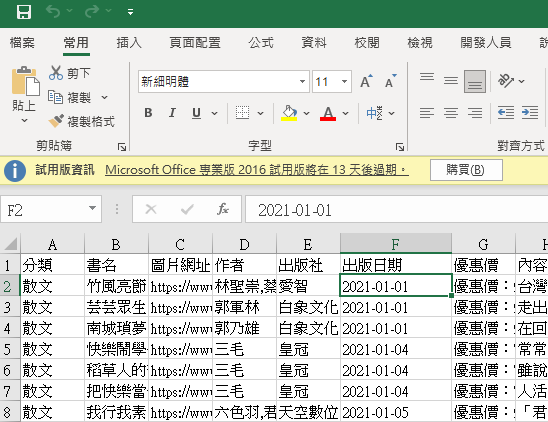

## csv

In [18]:
import csv
listtitle=["分類","書名","圖片網址","作者","出版社","出版日期","優惠價","內容"]
with open('books.csv','w',encoding = 'UTF-8-sig',newline ='') as f:
    writer = csv.writer(f)
    writer.writerow(listtitle)
    #writer.writerows(list_ans)
    for item1 in list_ans:
        writer.writerow(item1)
print("資料儲存完畢!") 

## sqlite

In [22]:
import sqlite3
conn = sqlite3.connect('booksfile.db')
cursor = conn.cursor()

sqlstr = '''CREATE TABLE IF NOT EXISTS scores \
("分類"       TEXT  NOT NULL,
 "書名"     TEXT PRIMARY KEY NOT NULL,
 "圖片網址"  TEXT NOT NULL,
 "作者"  TEXT NOT NULL,
 "出版社"     TEXT NOT NULL,
 "出版日期"     TEXT NOT NULL,
 "優惠價"     TEXT NOT NULL,
 "內容"     TEXT NOT NULL
 )
'''
cursor.execute(sqlstr)


conn.commit()
conn.close()

In [24]:
import sqlite3
conn = sqlite3.connect('booksfile.db')

for item1 in list_ans:
    conn.execute("INSERT INTO scores('分類', '書名', '圖片網址', '作者', '出版社','出版日期','優惠價','內容') VALUES \
                ('{}','{}','{}','{}','{}','{}','{}','{}')".format(item1[0],item1[1],item1[2],item1[3],item1[4],item1[5],item1[6],item1[7]))
conn.commit()
conn.close()
print("資料儲存完畢!") 

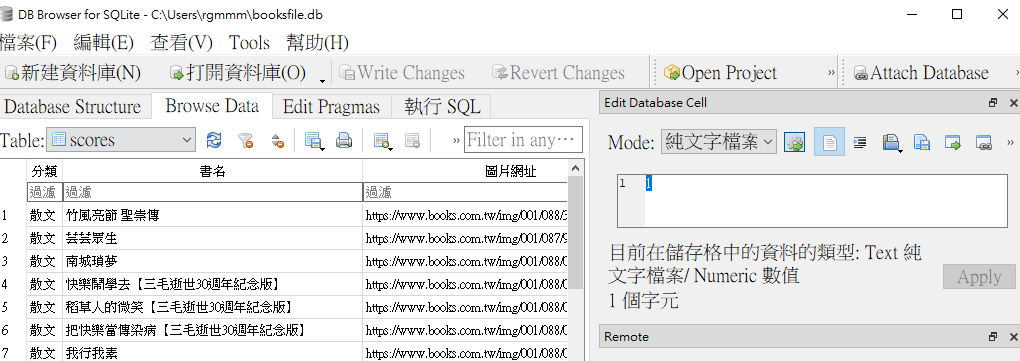

## Mysql

In [27]:
import pymysql
import cryptography
conn = pymysql.connect(host = 'localhost',port = 3306, user = 'root',passwd = '1234',
                      charset = 'utf8',db = 'bookfile')
with conn.cursor() as cursor:
    sql = """
    CREATE TABLE IF NOT EXISTS books(
    A     varchar(30),
    B     varchar(300),
    C     varchar(300),
    D     varchar(300),
    E     varchar(300),
    F     varchar(300),
    G     varchar(300),
    H     varchar(600)
    );
    """
    cursor.execute(sql)
    conn.commit()
conn.close()

In [28]:
import pymysql
import cryptography
conn = pymysql.connect(host = 'localhost',port = 3306, user = 'root',passwd = '1234',
                      charset = 'utf8',db = 'bookfile')
with conn.cursor() as cursor:
    cursor.executemany("insert into books(A, B, C, D, E, F, G, H) values (%s, %s, %s, %s, %s, %s, %s, %s)", list_ans )
    conn.commit()
conn.close()

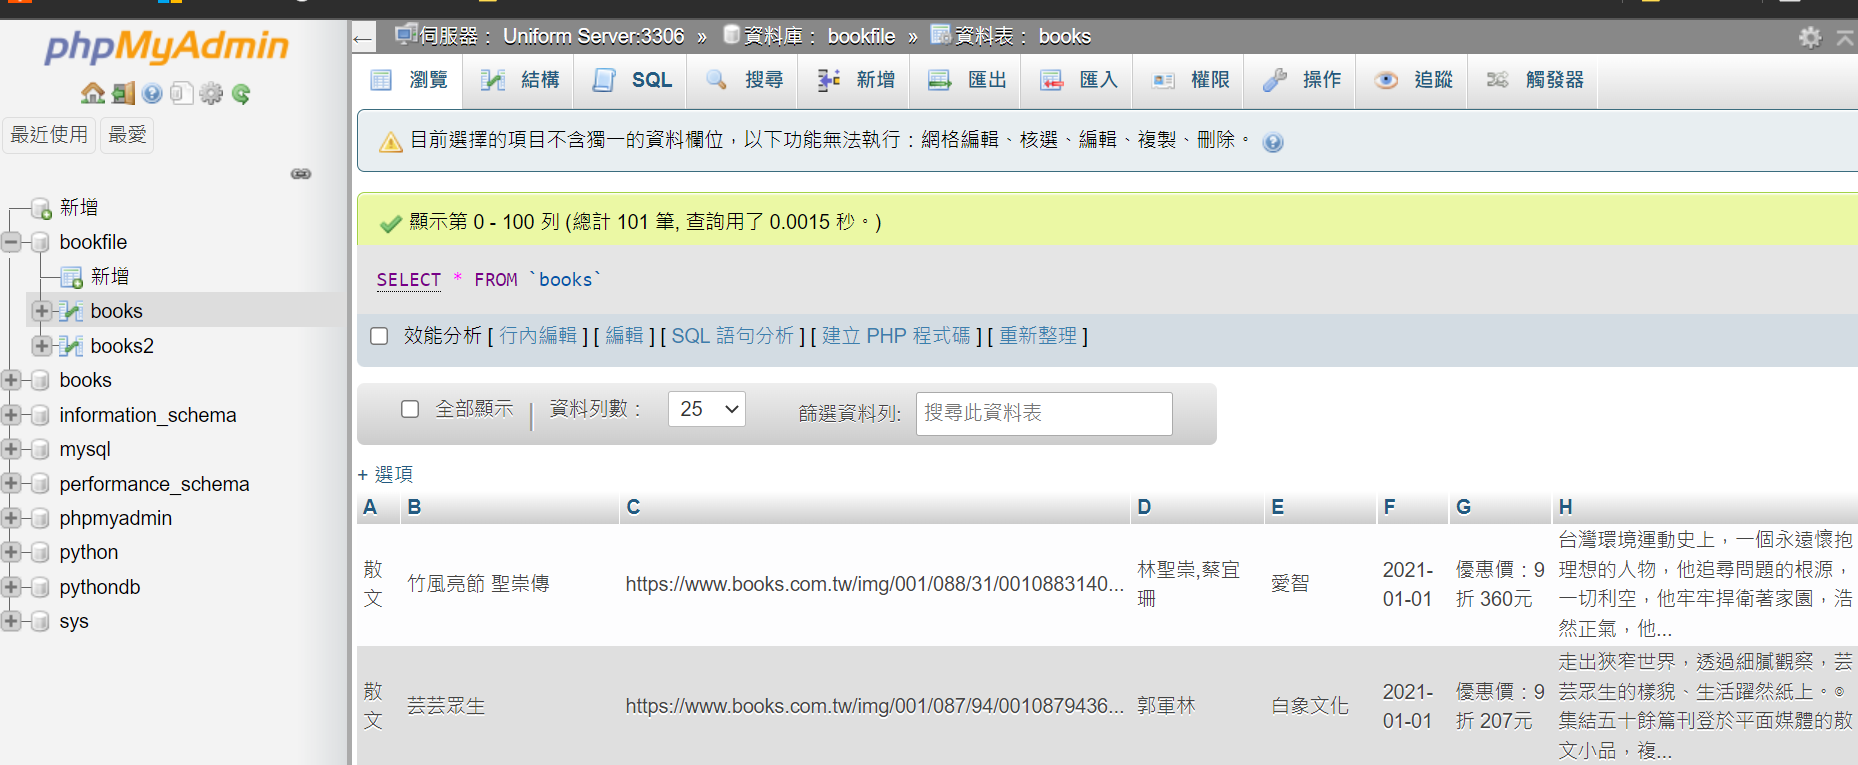

## Google sheet

In [32]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials as sac
auth_json = 'eddieyen-2021-1225-c5be42c429fe.json'
gs_scopes = ['https://spreadsheets.google.com/feeds']

cr = sac.from_json_keyfile_name(auth_json, gs_scopes)
gc = gspread.authorize(cr)

spreadsheet_key = '1Rr3fRTWTynEeB5skLM1hsDB87vs_cEYP3Rp4DCIvNXc'
sheet = gc.open_by_key(spreadsheet_key)

wks = sheet.sheet1
wks.clear()
listtitle=["分類","書名","圖片網址","作者","出版社","出版日期","優惠價","內容"]
wks.append_row(listtitle)
for items in list_ans:
    wks.append_row(items)
    sleep(1)

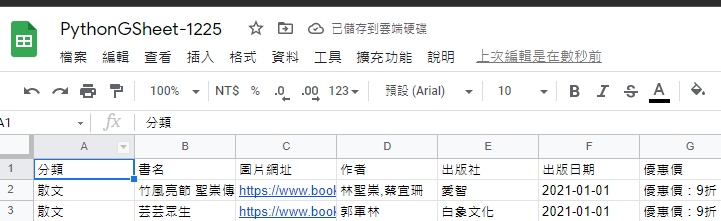

## 以下小說類
### 爬小說類

In [54]:
import requests
from bs4 import BeautifulSoup
import csv
import openpyxl
#import gspread
#from oauth2client.service_account import ServiceAccountCredentials
from time import sleep

# Excel_小說
list_ans =[]
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36'}
html1 = requests.get("https://www.books.com.tw/web/sys_bbotm/books/010202/?o=1&v=1&bp=3&page=1",headers=headers).text 
html2 = requests.get("https://www.books.com.tw/web/sys_bbotm/books/010202/?o=1&v=1&bp=3&page=2",headers=headers).text 

soup = BeautifulSoup(html1,'html.parser') 
#近期新書、在 class="mod type02_m012 clearfix" 中
res = soup.find_all('div',{'class':'mod type02_m012 clearfix'})[0]
items=res.select('.item')  # 所有 item
n=0  # 計算該分頁共有多少本書
kind = "小說"
for item in items:
    msg=item.select('.msg')[0] 
    src=item.select('a img')[0]["src"]
    title=msg.select('a')[0].text  #書名
    imgurl=src.split("?i=")[-1].split("&")[0] #圖片網址
    author=msg.select('a')[1].text #作者
    publish=msg.select('a')[2].text #出版社
    date=msg.find('span').text.split("：")[-1] #出版日期
    onsale=item.select('.price .set2')[0].text #優惠價
    content=item.select('.txt_cont')[0].text.replace(" ","").strip()  #內容
    # 將資料加入 list1 串列中
    n+=1
    #print("第一頁")
    #print("n=",n)
    listdata=[kind,title,imgurl,author,publish,date,onsale,content]
    list_ans.append(listdata)
soup = BeautifulSoup(html2,'html.parser') 
#近期新書、在 class="mod type02_m012 clearfix" 中
res = soup.find_all('div',{'class':'mod type02_m012 clearfix'})[0]
items=res.select('.item')  # 所有 item
n=0  # 計算該分頁共有多少本書
for item in items:
    msg=item.select('.msg')[0] 
    src=item.select('a img')[0]["src"]
    title=msg.select('a')[0].text  #書名
    imgurl=src.split("?i=")[-1].split("&")[0] #圖片網址
    author=msg.select('a')[1].text #作者
    publish=msg.select('a')[2].text #出版社
    date=msg.find('span').text.split("：")[-1] #出版日期
    onsale=item.select('.price .set2')[0].text #優惠價
    content=item.select('.txt_cont')[0].text.replace(" ","").strip()  #內容
    # 將資料加入 list1 串列中
    n+=1
    #print("第二頁")
    #print("n=",n)
    listdata=[kind,title,imgurl,author,publish,date,onsale,content]
    list_ans.append(listdata)
#print(list_ans)


In [55]:
Dict = {}
for item in list_ans:
    n = item[4] 
    if n in Dict:
        Dict[n] =  Dict[n] +1
    else:
        Dict[n] = 1
print("各出版社出版書的數目如下")
print(Dict)

各出版社出版書的數目如下
{'more': 5, '木果文創有限公司': 1, '白象文化': 3, '高寶': 1, '時報出版': 2, '香港管理學院': 1, '風雲時代': 3, '突破出版社': 1, '聯經出版公司': 3, '麥田': 3, '後話文字工作室': 1, '可澄音樂文創有限公司': 1, '皇冠': 1, '昌明文化': 1, '天地圖書': 10, '香港城市大學': 6, 'FUN學': 1, '前衛': 6, '長歌藝術傳播有限公司': 1, '新經典文化': 2, '印刻': 6, '東美出版事業有限公司': 2, '好讀': 1, '今日出版有限公司': 1, '三聯': 3, '香港中文大學': 2, '格子盒作室': 1, '蓋亞': 1, '牛津大學': 3, '獵海人': 4, '大旗出版社': 1, '商周出版': 1, '聯合文學': 4, '香港中和出版': 2, '台南市政府文化局': 3, '亞太政治哲學文化出版有限公司': 1, '上揚國際': 1, '南方家園': 2, '圓神': 1, '財團法人趨勢教育基金會': 1, '杯子藝文事業出版': 1, '心一堂': 1, '萬卷樓': 1, '草根': 4, '釀出版': 4, '宇河文化出版有限公司': 1, '奇幻基地': 2, '大風出版社': 1, '臺灣商務': 1, '香港kubrick': 1, '遠流': 1, '馥林文化': 1, '李敖出版社': 1, '秀威資訊': 1, '晨星': 1, '國家': 1}


### 統計

In [57]:
Dict ={"5":0,"6":0,"7":0}
for item in list_ans:
    n = item[6][-4]
    if n in Dict:
        Dict[n] +=1
print("各價位數量如下")
print(Dict)

各價位數量如下
{'5': 74, '6': 30, '7': 13}


In [ ]:
# 儲存 Excel
print("資料寫入Excel中，請等侯幾分鐘!")
workbook=openpyxl.Workbook()
sheet = workbook.worksheets[0]
listtitle=["分類","書名","圖片網址","作者","出版社","出版日期","優惠價","內容"]
sheet.append(listtitle)
for item1 in list_ans: #資料
    sheet.append(item1)
    sleep(0.1) # 必須加上適當的 delay  
workbook.save('books2_ans.xlsx')
print("資料儲存完畢!") 

## csv

In [36]:
import csv
listtitle=["分類","書名","圖片網址","作者","出版社","出版日期","優惠價","內容"]
with open('books2.csv','w',encoding = 'UTF-8-sig',newline ='') as f:
    writer = csv.writer(f)
    writer.writerow(listtitle)
    #writer.writerows(list_ans)
    for item1 in list_ans:
        writer.writerow(item1)
print("資料儲存完畢!") 

資料儲存完畢!


In [37]:
import sqlite3
conn = sqlite3.connect('booksfile.db')
cursor = conn.cursor()

sqlstr = '''CREATE TABLE IF NOT EXISTS books2 \
("分類"       TEXT  NOT NULL,
 "書名"     TEXT PRIMARY KEY NOT NULL,
 "圖片網址"  TEXT NOT NULL,
 "作者"  TEXT NOT NULL,
 "出版社"     TEXT NOT NULL,
 "出版日期"     TEXT NOT NULL,
 "優惠價"     TEXT NOT NULL,
 "內容"     TEXT NOT NULL
 )
'''
cursor.execute(sqlstr)


conn.commit()
conn.close()

In [38]:
import sqlite3
conn = sqlite3.connect('booksfile.db')

for item1 in list_ans:
    conn.execute("INSERT INTO books2('分類', '書名', '圖片網址', '作者', '出版社','出版日期','優惠價','內容') VALUES \
                ('{}','{}','{}','{}','{}','{}','{}','{}')".format(item1[0],item1[1],item1[2],item1[3],item1[4],item1[5],item1[6],item1[7]))
conn.commit()
conn.close()
print("資料儲存完畢!") 

資料儲存完畢!


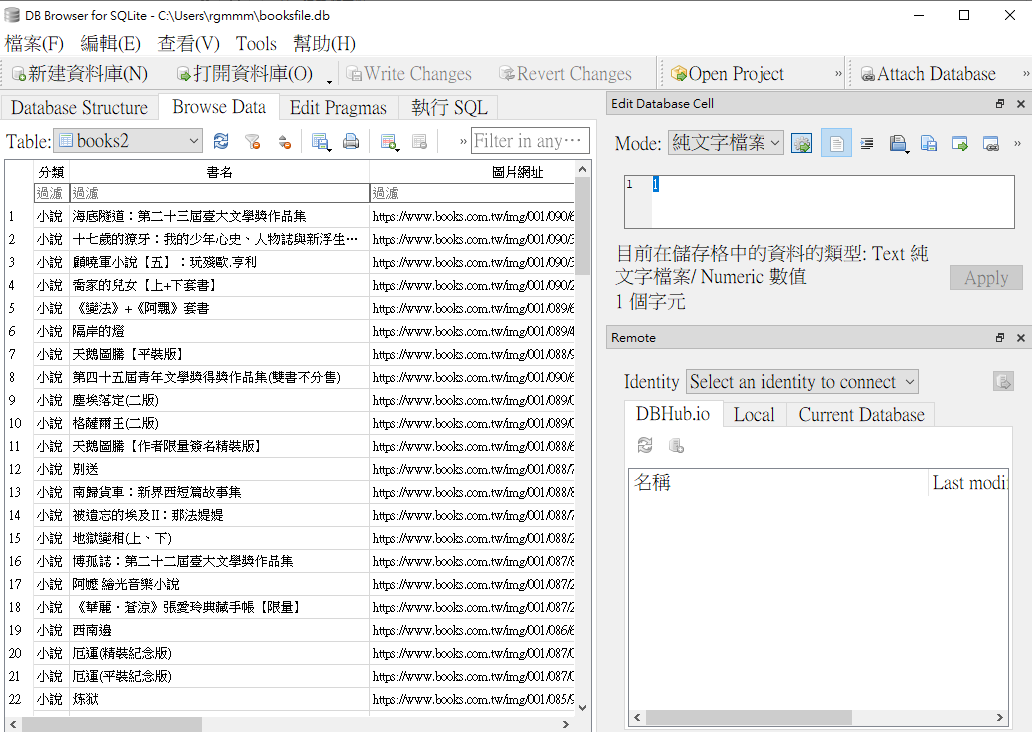

## MySQL

In [39]:
import pymysql
import cryptography
conn = pymysql.connect(host = 'localhost',port = 3306, user = 'root',passwd = '1234',
                      charset = 'utf8',db = 'bookfile')
with conn.cursor() as cursor:
    sql = """
    CREATE TABLE IF NOT EXISTS books2(
    A     varchar(30),
    B     varchar(300),
    C     varchar(300),
    D     varchar(300),
    E     varchar(300),
    F     varchar(300),
    G     varchar(300),
    H     varchar(600)
    );
    """
    cursor.execute(sql)
    conn.commit()
conn.close()

In [40]:
import pymysql
import cryptography
conn = pymysql.connect(host = 'localhost',port = 3306, user = 'root',passwd = '1234',
                      charset = 'utf8',db = 'bookfile')
with conn.cursor() as cursor:
    cursor.executemany("insert into books2(A, B, C, D, E, F, G, H) values (%s, %s, %s, %s, %s, %s, %s, %s)", list_ans )
    conn.commit()
conn.close()

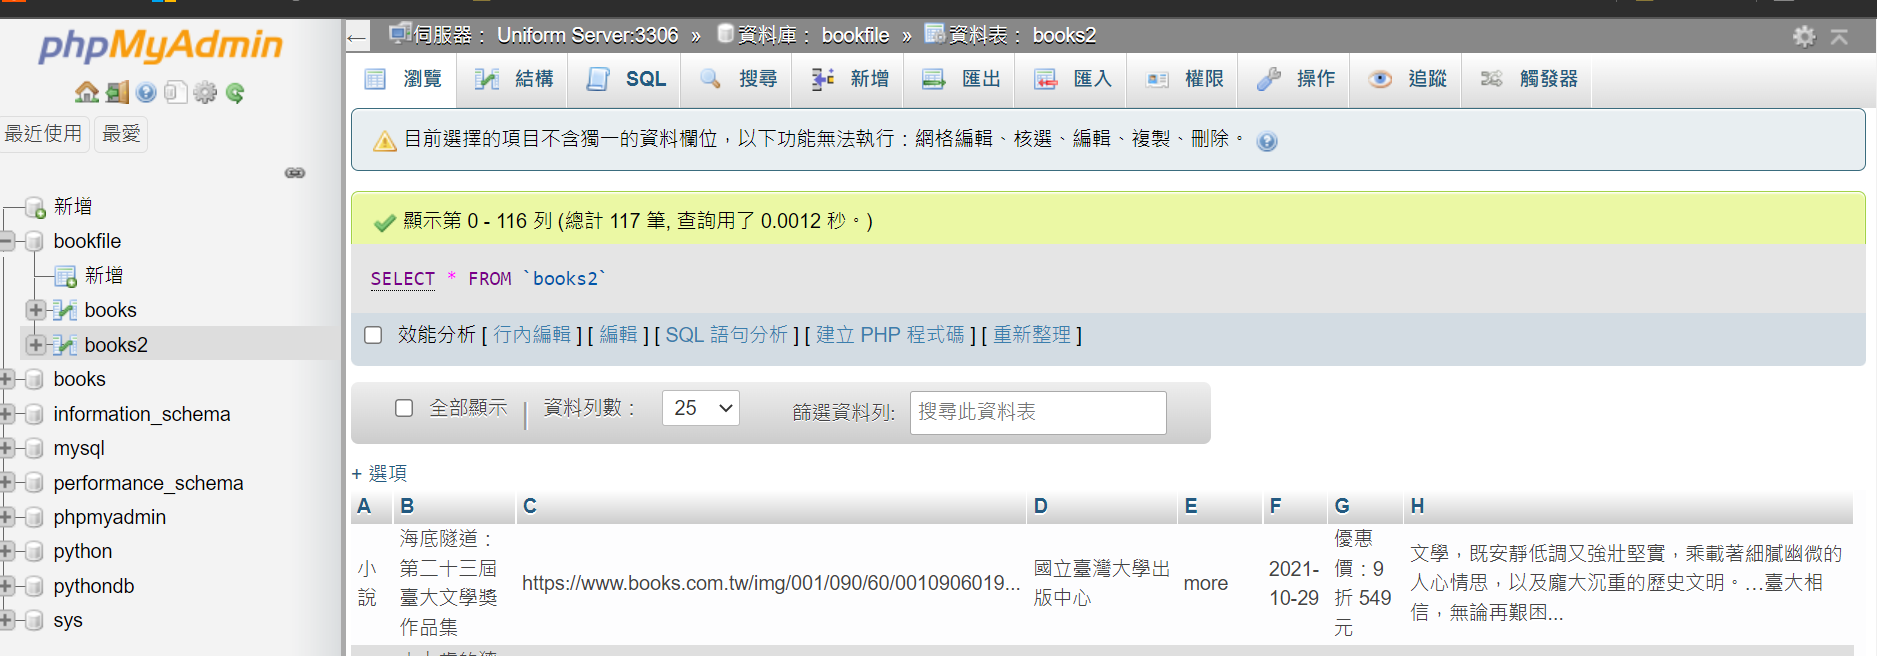

In [45]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials as sac
auth_json = 'eddieyen-2021-1225-c5be42c429fe.json'
gs_scopes = ['https://spreadsheets.google.com/feeds']

cr = sac.from_json_keyfile_name(auth_json, gs_scopes)
gc = gspread.authorize(cr)

spreadsheet_key = '1Rr3fRTWTynEeB5skLM1hsDB87vs_cEYP3Rp4DCIvNXc'
sheet = gc.open_by_key(spreadsheet_key)

wks = sheet.sheet1

wks.clear()
listtitle=["分類","書名","圖片網址","作者","出版社","出版日期","優惠價","內容"]
wks.append_row(listtitle)
for items in list_ans:
    wks.append_row(items)
    sleep(1)

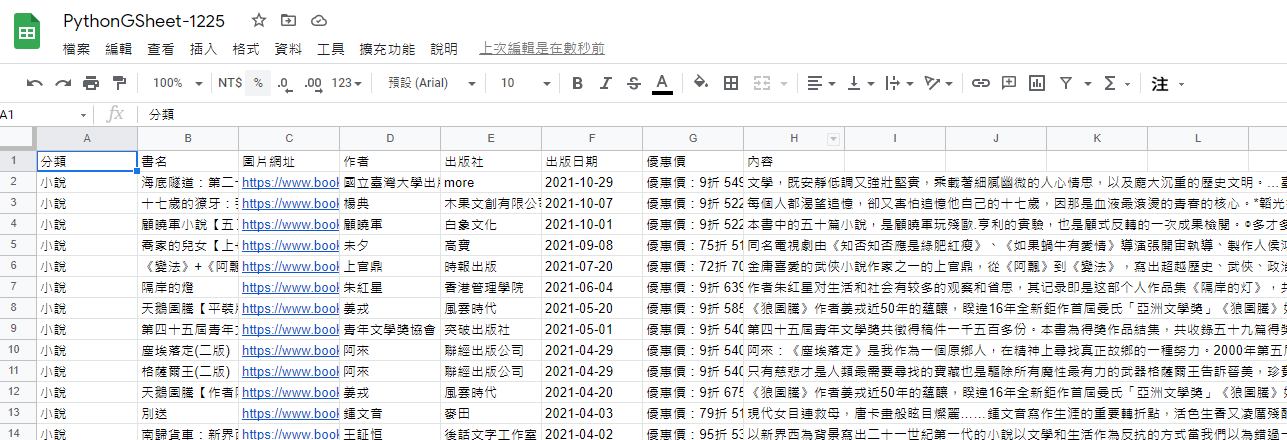